<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n250.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.572651,91.579261,80.229574,0.001109,262.382595,262.379550,0.003045
1,0.0,1.0,78.946605,52.945020,21.971366,0.006837,163.869828,163.862686,0.007142
2,0.0,2.0,48.671407,36.467036,59.715341,-0.052893,154.800891,154.852119,-0.051228
3,0.0,3.0,97.954224,98.076822,89.530857,-0.006168,295.555735,295.558017,-0.002282
4,0.0,4.0,29.030548,98.803789,95.329987,0.035148,233.199471,233.166943,0.032528
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.781745,28.545694,51.312752,0.045067,172.685258,172.637085,0.048173
249996,999.0,246.0,83.403896,24.418041,89.380915,0.118475,207.321327,207.198599,0.122729
249997,999.0,247.0,87.328707,96.557102,49.467845,-0.043807,243.309847,243.354549,-0.044702
249998,999.0,248.0,37.547885,36.875985,86.214710,0.075258,170.713837,170.639003,0.074835


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.572651,91.579261,80.229574,0.001109,262.382595,262.379550,0.003045
1,0.0,1.0,78.946605,52.945020,21.971366,0.006837,163.869828,163.862686,0.007142
2,0.0,2.0,48.671407,36.467036,59.715341,-0.052893,154.800891,154.852119,-0.051228
3,0.0,3.0,97.954224,98.076822,89.530857,-0.006168,295.555735,295.558017,-0.002282
4,0.0,4.0,29.030548,98.803789,95.329987,0.035148,233.199471,233.166943,0.032528
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.781745,28.545694,51.312752,0.045067,172.685258,172.637085,0.048173
249996,999.0,246.0,83.403896,24.418041,89.380915,0.118475,207.321327,207.198599,0.122729
249997,999.0,247.0,87.328707,96.557102,49.467845,-0.043807,243.309847,243.354549,-0.044702
249998,999.0,248.0,37.547885,36.875985,86.214710,0.075258,170.713837,170.639003,0.074835


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    80.572651  91.579261  80.229574  ...  262.382595  262.379550  0.003045
      1.0    78.946605  52.945020  21.971366  ...  163.869828  163.862686  0.007142
      2.0    48.671407  36.467036  59.715341  ...  154.800891  154.852119 -0.051228
      3.0    97.954224  98.076822  89.530857  ...  295.555735  295.558017 -0.002282
      4.0    29.030548  98.803789  95.329987  ...  233.199471  233.166943  0.032528
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  82.781745  28.545694  51.312752  ...  172.685258  172.637085  0.048173
      246.0  83.403896  24.418041  89.380915  ...  207.321327  207.198599  0.122729
      247.0  87.328707  96.557102  49.467845  ...  243.309847  243.354549 -0.044702
      248.0  37.547885  36.875985  86.214710  ...  170.713837  170.639003  0.074835
      249.0  95.528107  46.963368  84.616873  ...  237.083582  237.104629 -0.021047

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    80.572651  91.579261  80.229574  ...  262.382595  262.379550  0.003045
      1.0    78.946605  52.945020  21.971366  ...  163.869828  163.862686  0.007142
      2.0    48.671407  36.467036  59.715341  ...  154.800891  154.852119 -0.051228
      3.0    97.954224  98.076822  89.530857  ...  295.555735  295.558017 -0.002282
      4.0    29.030548  98.803789  95.329987  ...  233.199471  233.166943  0.032528
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  82.781745  28.545694  51.312752  ...  172.685258  172.637085  0.048173
      246.0  83.403896  24.418041  89.380915  ...  207.321327  207.198599  0.122729
      247.0  87.328707  96.557102  49.467845  ...  243.309847  243.354549 -0.044702
      248.0  37.547885  36.875985  86.214710  ...  170.713837  170.639003  0.074835
      249.0  95.528107  46.963368  84.616873  ...  237.083582  237.104629 -0.021047

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.572651,91.579261,80.229574,0.001109,262.382595,262.379550,0.003045
1,0.0,1.0,78.946605,52.945020,21.971366,0.006837,163.869828,163.862686,0.007142
2,0.0,2.0,48.671407,36.467036,59.715341,-0.052893,154.800891,154.852119,-0.051228
3,0.0,3.0,97.954224,98.076822,89.530857,-0.006168,295.555735,295.558017,-0.002282
4,0.0,4.0,29.030548,98.803789,95.329987,0.035148,233.199471,233.166943,0.032528
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.781745,28.545694,51.312752,0.045067,172.685258,172.637085,0.048173
249996,999.0,246.0,83.403896,24.418041,89.380915,0.118475,207.321327,207.198599,0.122729
249997,999.0,247.0,87.328707,96.557102,49.467845,-0.043807,243.309847,243.354549,-0.044702
249998,999.0,248.0,37.547885,36.875985,86.214710,0.075258,170.713837,170.639003,0.074835


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    80.572651  91.579261  80.229574  ...  262.382595  262.379550  0.003045
      1.0    78.946605  52.945020  21.971366  ...  163.869828  163.862686  0.007142
      2.0    48.671407  36.467036  59.715341  ...  154.800891  154.852119 -0.051228
      3.0    97.954224  98.076822  89.530857  ...  295.555735  295.558017 -0.002282
      4.0    29.030548  98.803789  95.329987  ...  233.199471  233.166943  0.032528
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  82.781745  28.545694  51.312752  ...  172.685258  172.637085  0.048173
      246.0  83.403896  24.418041  89.380915  ...  207.321327  207.198599  0.122729
      247.0  87.328707  96.557102  49.467845  ...  243.309847  243.354549 -0.044702
      248.0  37.547885  36.875985  86.214710  ...  170.713837  170.639003  0.074835
      249.0  95.528107  46.963368  84.616873  ...  237.083582  237.104629 -0.021047

[250000 rows x 7 columns]

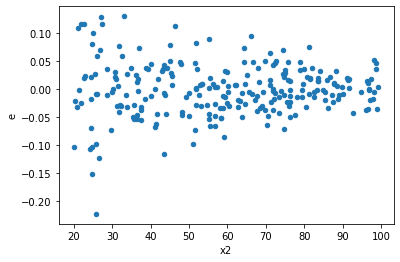

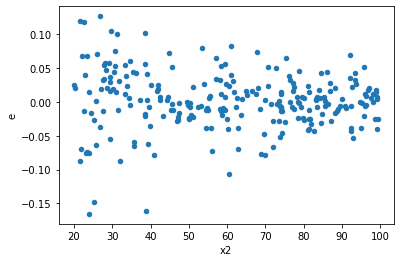

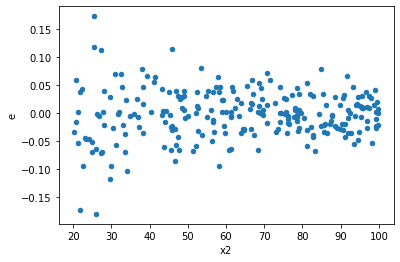

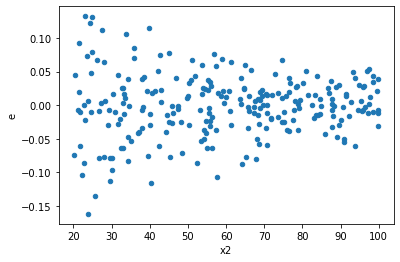

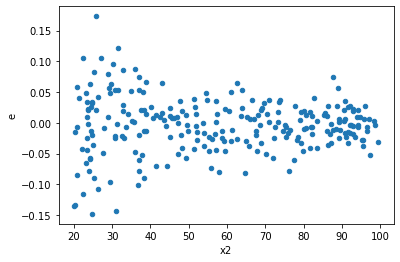

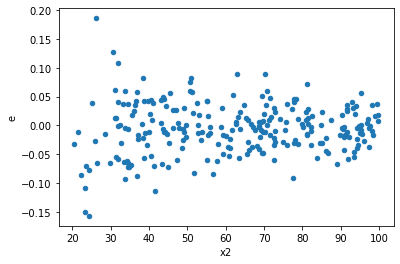

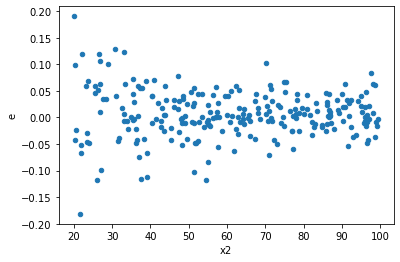

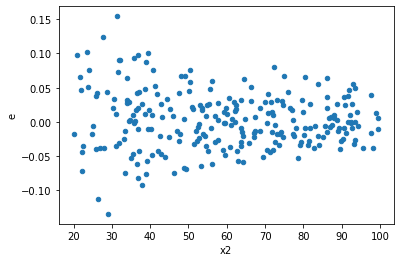

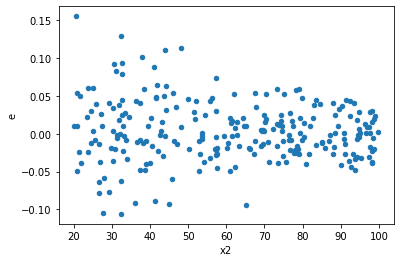

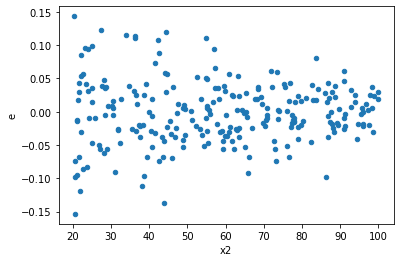

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.3876623088305572,0.08694342148783057,0.003996518647737703,0.0008963239328642328,0.22427617931211508,1.940360954211285e-12,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,0.2869948471768307,0.06923637075947453,0.002958709764709595,0.0007137770181389126,0.24124604131590843,1.816083378169281e-11,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,0.3085765625395126,0.07598928825494049,0.0031812016756650784,0.0007833947242777369,0.24625748511023163,3.364011664525257e-11,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,0.35914687444706345,0.07067853166346989,0.003702545097392407,0.0007286446563244318,0.19679561954224264,2.931886494906453e-14,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,0.36724028847536133,0.06781384785453035,0.003785982355416096,0.0006991118335518592,0.18465797458134847,3.5089923621273853e-15,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,0.3041482158805803,0.09876346539478054,0.0031355486173255697,0.0010181800556162942,0.32472150168245173,7.087098778147997e-08,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,0.3432593380187784,0.09537487984736961,0.0035387560620492617,0.0009832461839935011,0.2778507946727789,1.1030277551821906e-09,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,0.2956876893263153,0.08379371882799551,0.0030483266940857247,0.0008638527714226341,0.2833858894122655,1.9094189616645874e-09,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,0.2565103283430799,0.0702489455692215,0.0026444363746709267,0.0007242159337033144,0.2738640039291684,7.349698987509631e-10,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64